<a href="https://colab.research.google.com/github/rishitharaj/Deep-Learning/blob/main/Deep_Learning_Diabetes_Progression_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Deep Learning Module End Project**

**Objective:** You are required to model the progression of diabetes using the available independent variables. This model will help healthcare professionals understand how different factors influence the progression of diabetes and potentially aid in designing better treatment plans and preventive measures. The model will provide insights into the dynamics of diabetes progression in patients.

**Loading and Preprocessing**
- Load the Diabetes dataset from sklearn.
- Handle any missing values if present.
- Normalize the features to ensure better performance of the ANN model.

In [42]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import random

np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)


In [43]:
# Load dataset

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

# Convert to DataFrame for easier handling
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y

df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [44]:
# Checking for null values

df.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


In [45]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [46]:
# Normalization to improves ANN training.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Exploratory Data Analysis (EDA)**
- Perform EDA to understand the distribution of features and the target variable.
- Visualize the relationships between features and the target variable.

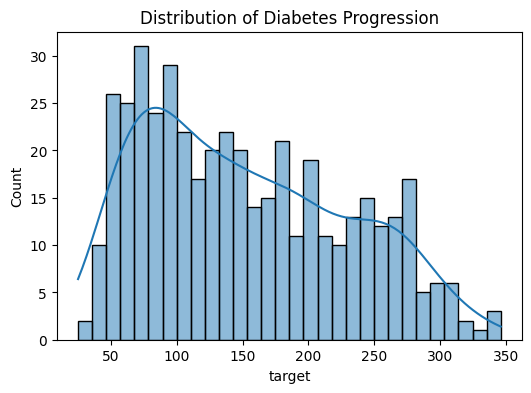

In [47]:
# Distribution

plt.figure(figsize=(6,4))
sns.histplot(df['target'], bins=30, kde=True)
plt.title("Distribution of Diabetes Progression")
plt.show()


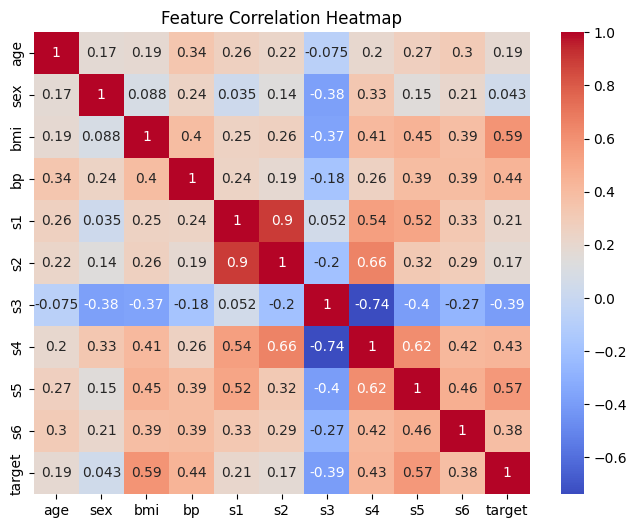

In [48]:
# Correlation

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


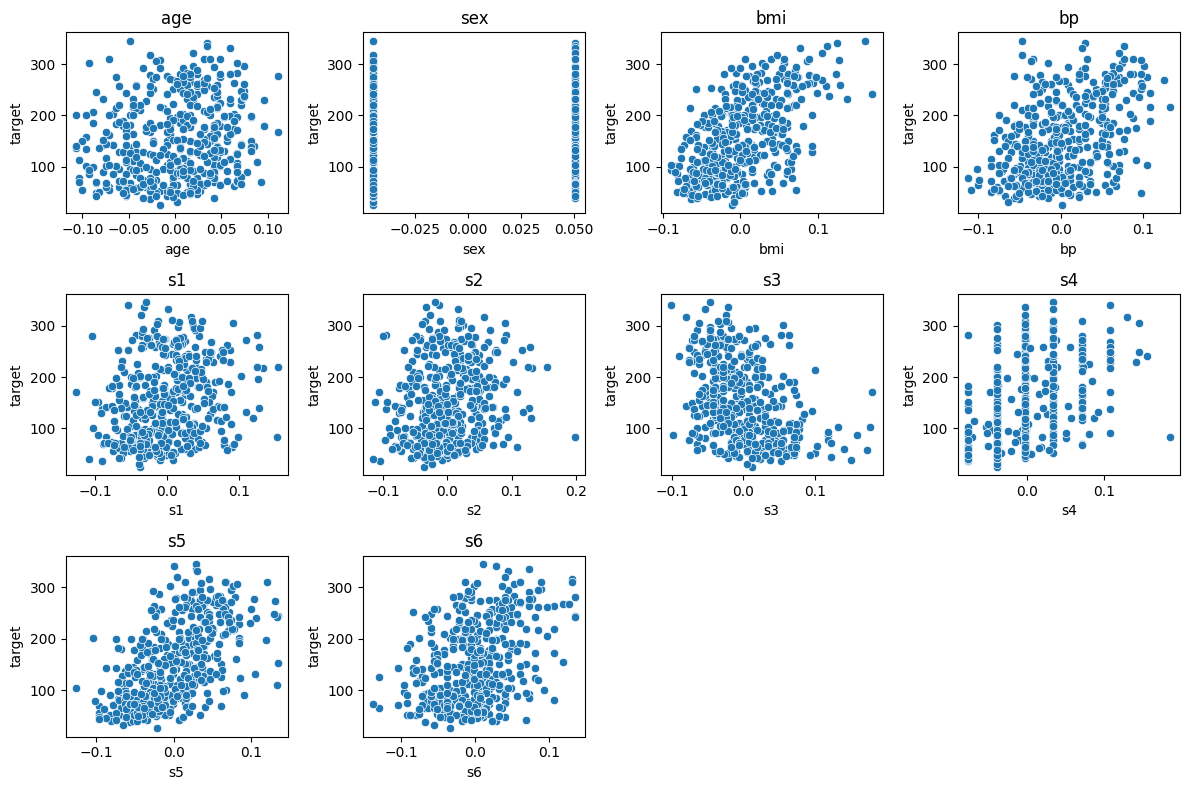

In [49]:
# Relationship between features and target

plt.figure(figsize=(12,8))
for i, col in enumerate(diabetes.feature_names):
    plt.subplot(3,4,i+1)
    sns.scatterplot(x=df[col], y=df['target'])
    plt.title(col)
plt.tight_layout()
plt.show()


**Building the ANN Model**
- Design a simple ANN architecture with at least one hidden layer.
- Use appropriate activation functions .

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [51]:
from tensorflow.keras import Input

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])


**Training the ANN Model**
- Split the dataset into training and testing sets.
- Train the model on the training data.
- Use an appropriate loss function and optimizer.

In [52]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 897 (3.50 KB)

 Trainable params: 897 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 30369.4238 - mae: 155.4604 - val_loss: 22444.8496 - val_mae: 133.9871
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30189.3145 - mae: 154.9236 - val_loss: 22314.2598 - val_mae: 133.5398
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30004.0078 - mae: 154.3912 - val_loss: 22168.7656 - val_mae: 133.0518
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29785.2129 - mae: 153.7809 - val_loss: 21991.6973 - val_mae: 132.4676
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29510.8926 - mae: 153.0312 - val_loss: 21771.7266 - val_mae: 131.7463
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29156.8789 - mae: 152.0695 - val_loss: 21490.6582 - val_mae: 130.8334
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28694.6523 - mae: 150.8171 - val_loss: 21122.1484 - val_mae: 129.6450
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 28083.6758 - mae: 149.1555 - val_loss

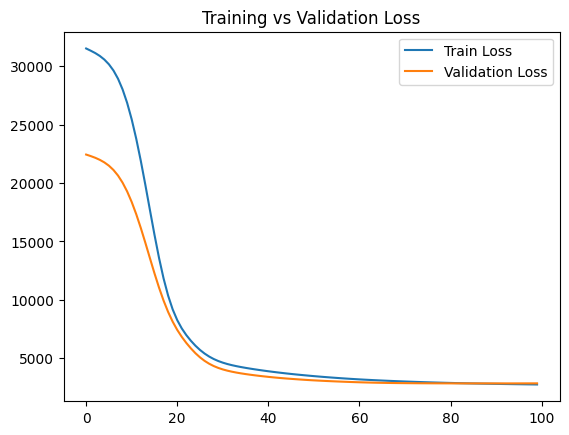

In [54]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


**Evaluating the Model**
- Evaluate the model on the testing data.
- Report the performance metrics (e.g., Mean Squared Error, R2 Score).

In [55]:
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [56]:
# Performance metrics

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 2965.392425336384
R2 Score: 0.4402968117765508


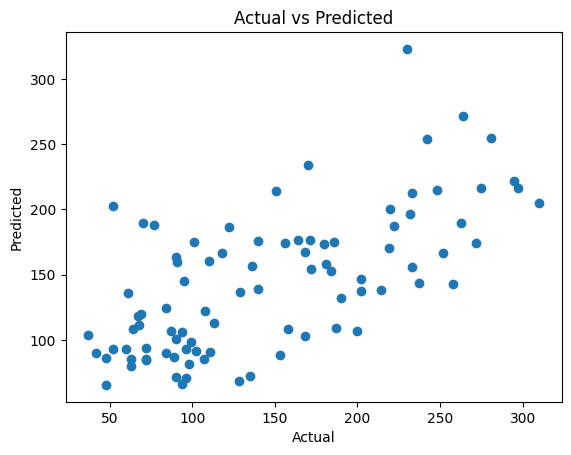

In [57]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


**Improving the Model**
- Experiment with different architectures, activation functions, or hyperparameters to improve the model performance.
- Report the changes made and the corresponding improvement in performance.

In [61]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

improved_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])


improved_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

history2 = improved_model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 30272.1172 - mae: 155.0956 - val_loss: 22271.5840 - val_mae: 133.3424
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29917.0254 - mae: 154.0596 - val_loss: 21950.8906 - val_mae: 132.2570
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29429.8555 - mae: 152.6502 - val_loss: 21458.5664 - val_mae: 130.5962
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 28645.4375 - mae: 150.3791 - val_loss: 20686.2617 - val_mae: 127.9829
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27393.9297 - mae: 146.7283 - val_loss: 19528.2246 - val_mae: 124.0277
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 25517.3945 - mae: 141.1253 - val_loss: 17920.1582 - val_mae: 118.3619
Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22933.9180 - mae: 132.9977 - val_loss: 15861.2627 - val_mae: 110.6285
Epoch 8/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19721.0547 - mae: 122.2415 - val_loss

In [62]:
y_pred2 = improved_model.predict(X_test)

mse2 = mean_squared_error(y_test, y_pred2)
r22 = r2_score(y_test, y_pred2)

print("Improved Model MSE:", mse2)
print("Improved Model R2:", r22)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Improved Model MSE: 2884.933103078646
Improved Model R2: 0.45548311184435564


In [63]:
print("Original Model R2:", r2)
print("Improved Model R2:", r22)


Original Model R2: 0.4402968117765508
Improved Model R2: 0.45548311184435564


**Observations:**

The ANN model successfully predicted diabetes progression using patient features. After tuning the architecture, the model achieved improved performance, demonstrating that deeper networks with regularization can better capture nonlinear relationships.